# Census Income Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn .model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
ci=pd.read_csv("untitled2.txt")
ci

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32555,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32556,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32557,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
ci.duplicated().sum()

24

In [4]:
ci.drop_duplicates(keep='last', inplace=True)

In [5]:
ci.isin([' ?']).sum()

Age                  0
Workclass         1835
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1842
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     581
Income               0
dtype: int64

In [6]:
ci=ci.replace(' ?',np.NaN)

In [7]:
ci.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
ci.keys()

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [9]:
ci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32535 entries, 0 to 32558
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32535 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32535 non-null  int64 
 3   Education       32535 non-null  object
 4   Education_num   32535 non-null  int64 
 5   Marital_status  32535 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32535 non-null  object
 8   Race            32535 non-null  object
 9   Sex             32535 non-null  object
 10  Capital_gain    32535 non-null  int64 
 11  Capital_loss    32535 non-null  int64 
 12  Hours_per_week  32535 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32535 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [10]:
ci.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32535.000000,3.253500e+04,32535.000000,32535.000000,32535.000000,32535.000000
mean,38.585523,1.897853e+05,10.081604,1078.336745,87.373598,40.440357
std,13.638402,1.055577e+05,2.571569,7388.170170,403.113641,12.347268
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178300e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369935e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
ci.shape

(32535, 15)

In [12]:
ci.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [13]:
ci.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32554,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32555,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32556,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32557,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32558,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Exploratory Data Analysis

In [14]:
ci.isnull().sum()

Age                  0
Workclass         1835
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1842
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     581
Income               0
dtype: int64

<Axes: >

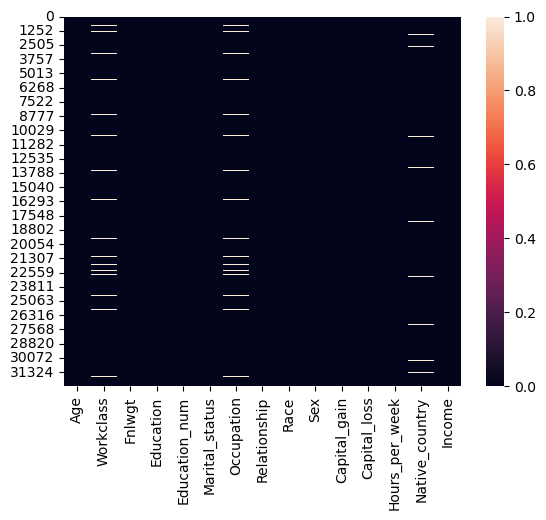

In [15]:
sns.heatmap(ci.isnull())

In [16]:
ci['Occupation'].fillna(ci['Occupation'].mode()[0],inplace=True)
ci['Workclass'].fillna(ci['Workclass'].mode()[0],inplace=True)
ci['Native_country'].fillna(ci['Native_country'].mode()[0],inplace=True)

<Axes: >

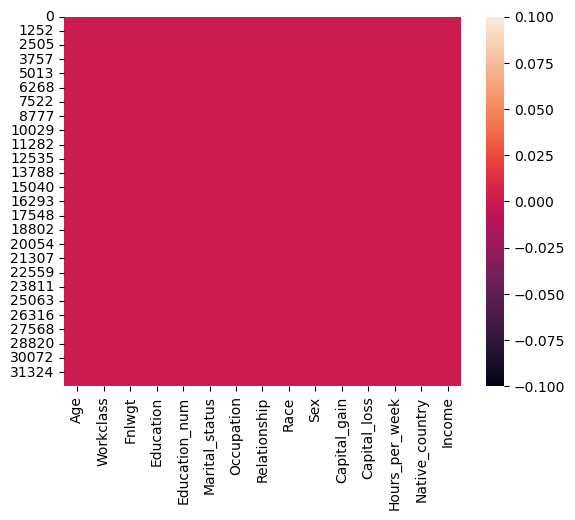

In [17]:
sns.heatmap(ci.isnull())

<Axes: >

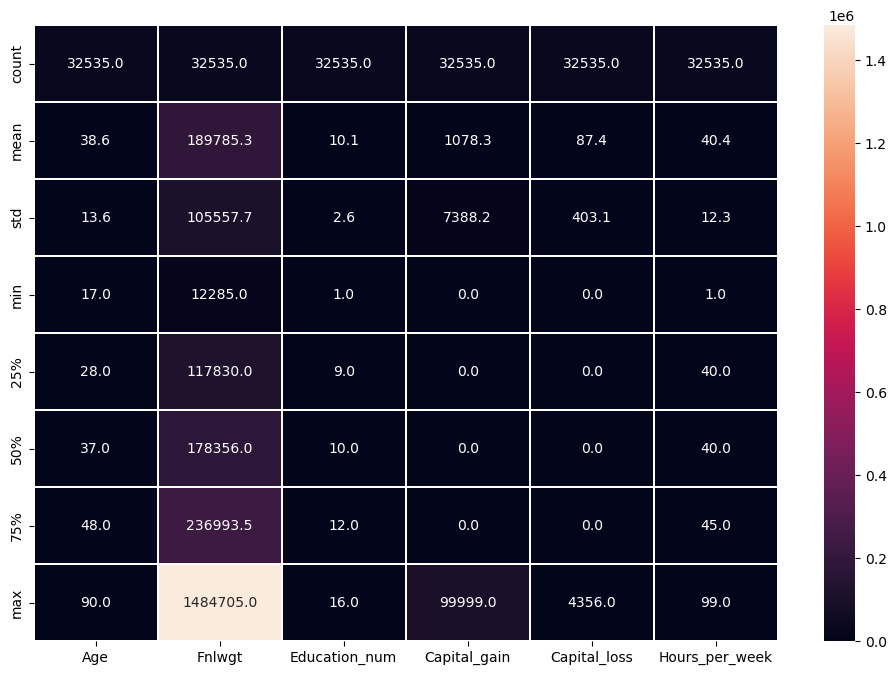

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(ci.describe(),linewidths = 0.1,fmt='0.1f',annot = True)

In [19]:
ci.skew()

Age                0.557652
Fnlwgt             1.447652
Education_num     -0.309451
Capital_gain      11.949147
Capital_loss       4.592542
Hours_per_week     0.228745
dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

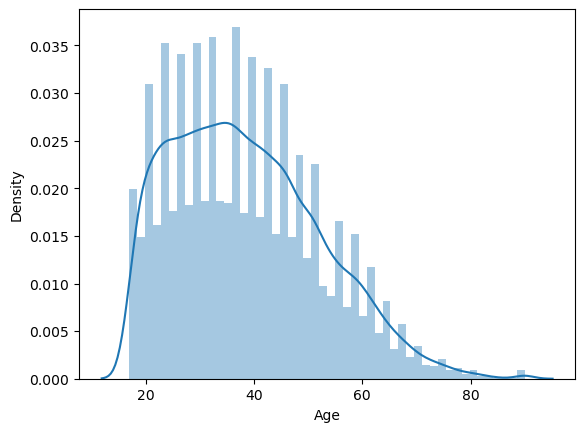

In [20]:
sns.distplot(ci['Age'])

<Axes: xlabel='Education_num', ylabel='Density'>

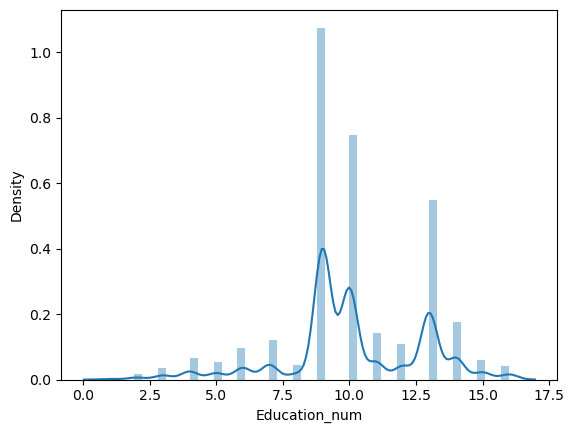

In [21]:
sns.distplot(ci['Education_num'])

<Axes: xlabel='Fnlwgt', ylabel='Density'>

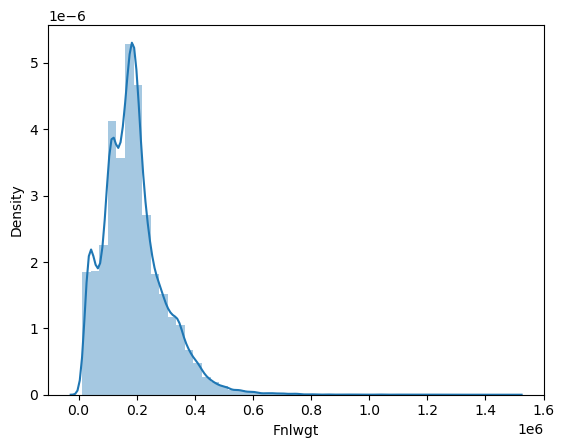

In [22]:
sns.distplot(ci['Fnlwgt'])

<Axes: xlabel='Capital_gain', ylabel='Density'>

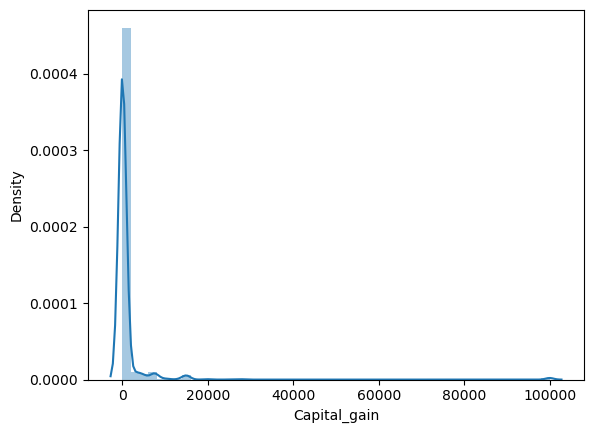

In [23]:
sns.distplot(ci['Capital_gain'])

<Axes: xlabel='Capital_loss', ylabel='Density'>

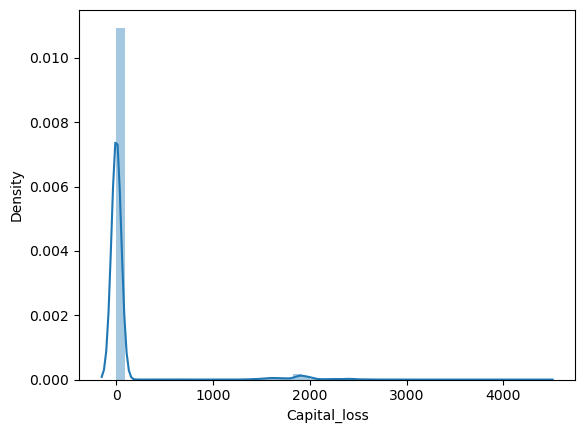

In [24]:
sns.distplot(ci['Capital_loss'])

<Axes: xlabel='Hours_per_week', ylabel='Density'>

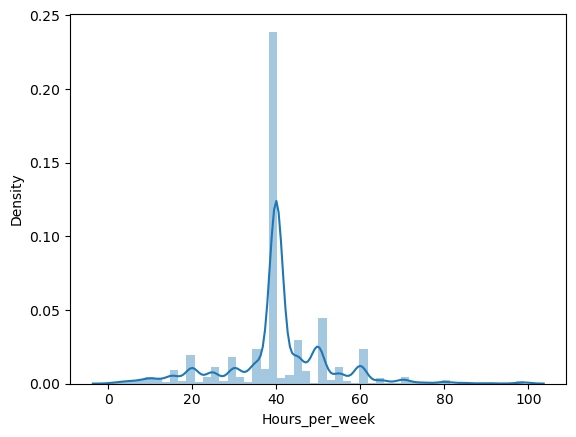

In [25]:
sns.distplot(ci['Hours_per_week'])

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

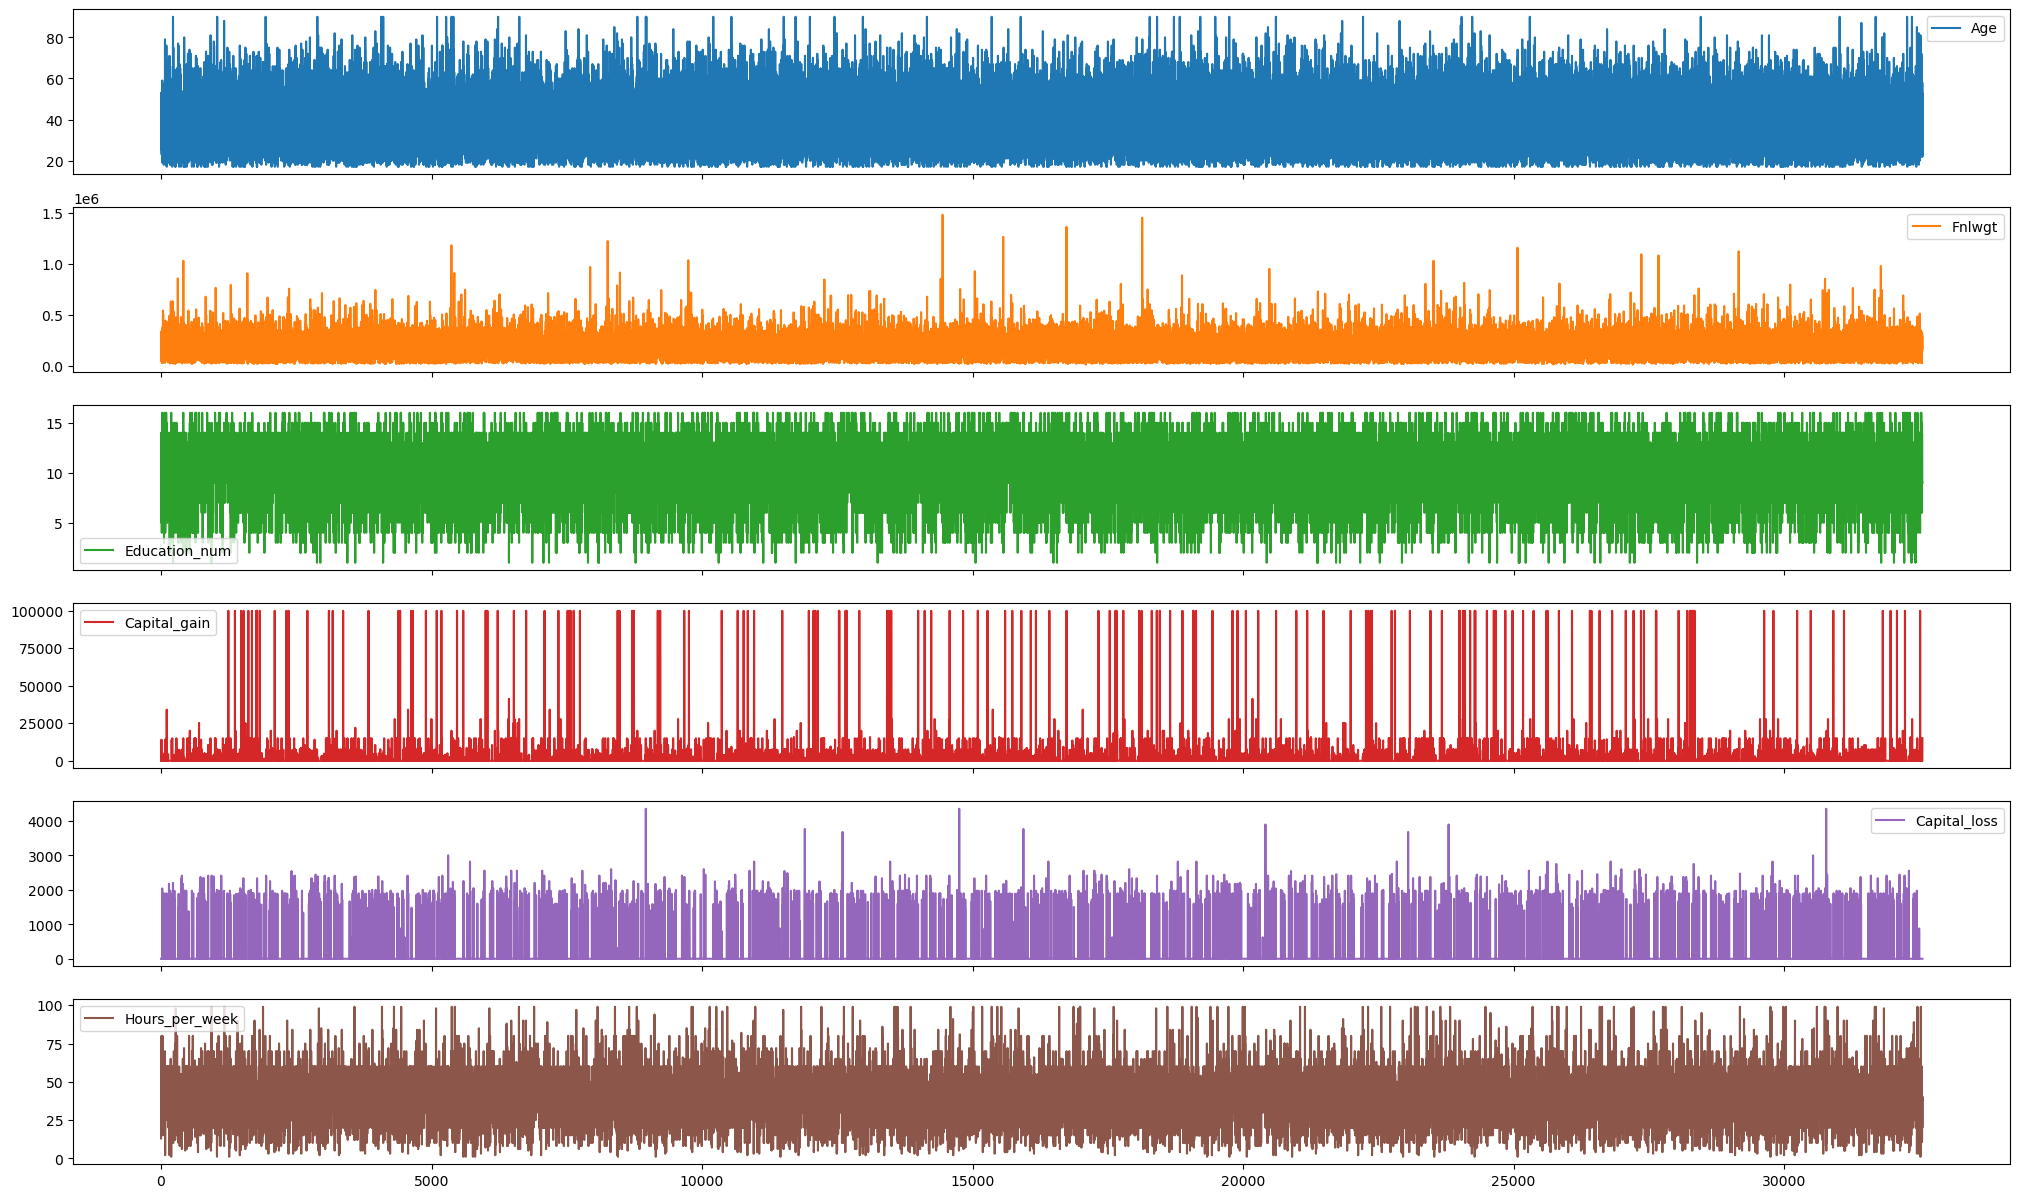

In [26]:
ci.plot(subplots=True, figsize=(25,15))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fnlwgt'}>],
       [<Axes: title={'center': 'Education_num'}>,
        <Axes: title={'center': 'Capital_gain'}>],
       [<Axes: title={'center': 'Capital_loss'}>,
        <Axes: title={'center': 'Hours_per_week'}>]], dtype=object)

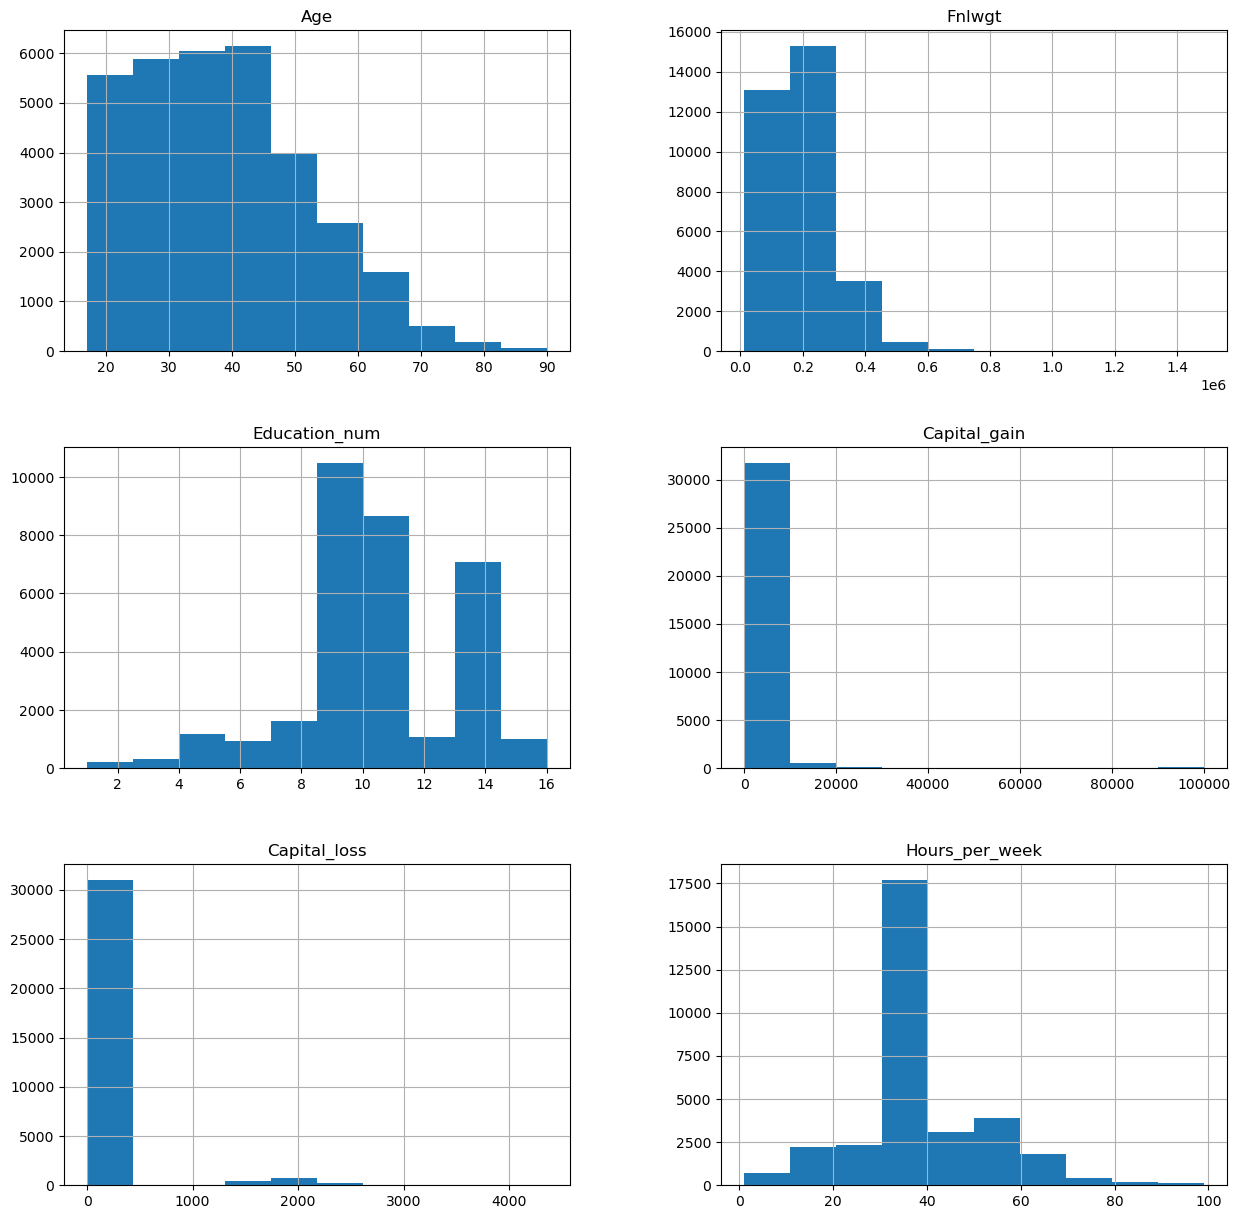

In [27]:
ci.hist(bins=10,figsize=(15,15))

<Axes: >

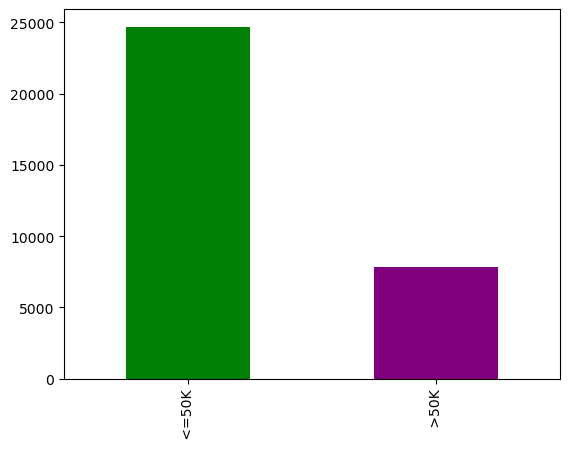

In [28]:
ci['Income'].value_counts().plot(kind='bar', color=['green', 'purple'])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

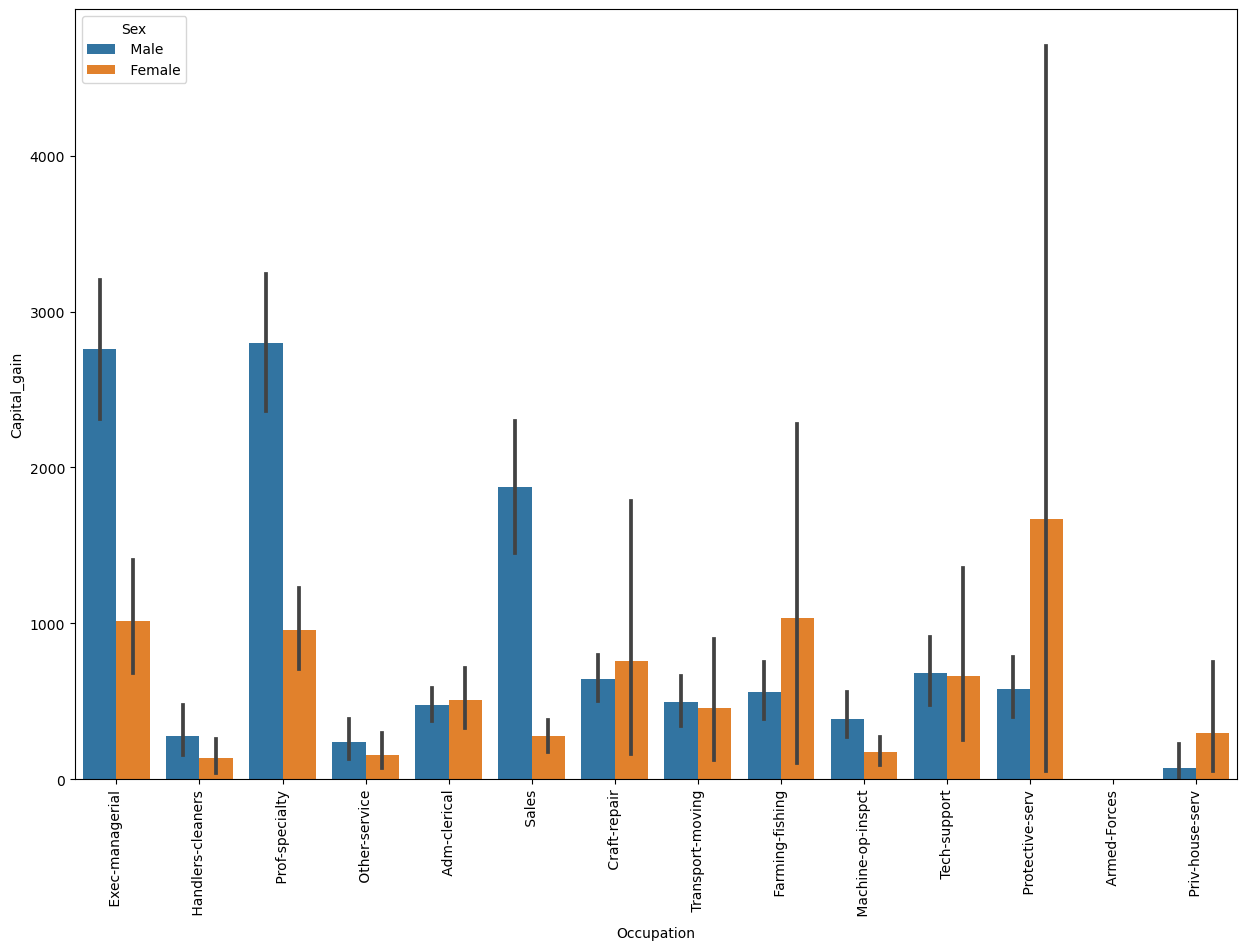

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(x='Occupation',y='Capital_gain',data=ci,hue='Sex')
plt.xticks(rotation=90)

<Axes: >

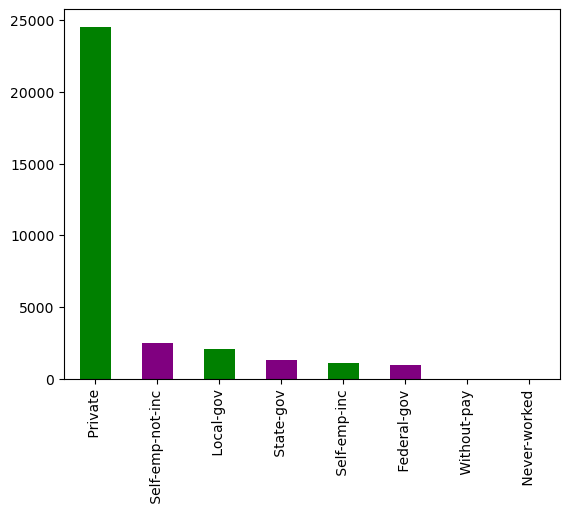

In [30]:
ci['Workclass'].value_counts().plot(kind='bar', color=['green', 'purple'])

<Axes: ylabel='Income'>

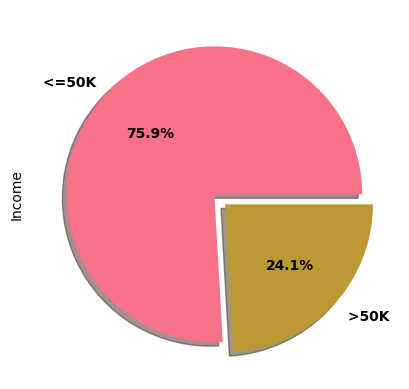

In [31]:
sns.set_palette('husl')
ci['Income'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':10},shadow=True)


<Axes: ylabel='Sex'>

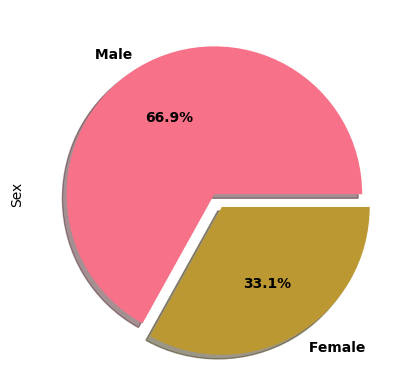

In [32]:
sns.set_palette('husl')
ci['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':10},shadow=True)

Male (66.9%): The larger pink slice represents the percentage of men in this group.
Female (33.1%): The smaller golden slice represents the percentage of women.
There are more males than females.

<Axes: ylabel='Relationship'>

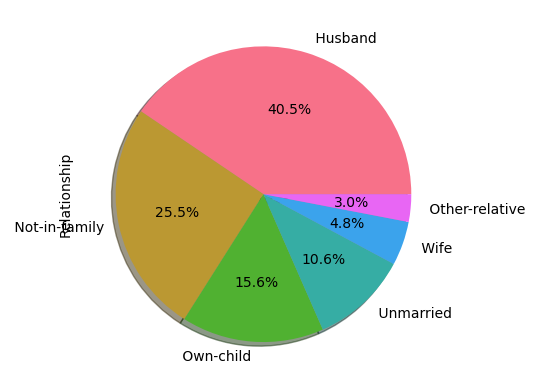

In [33]:
sns.set_palette('husl')
ci['Relationship'].value_counts().plot.pie(autopct='%3.1f%%',
                                          textprops ={'fontsize':10},shadow=True)

Husband (10.6%) and Wife (15.6%) These slices likely represent people who are spouses. When combined, they account for 26.2% of the pie.
Own Child (4.8%) This slice represents people who have biological children.
Other Relative (3.0%) This slice represents people who have other relatives, such as cousins, aunts, or uncles.
Not-in-Family (25.5%) This slice represents people who are not related to anyone in the household.
Unmarried (15.6%) This slice  represent people who are single.

<Axes: ylabel='Education'>

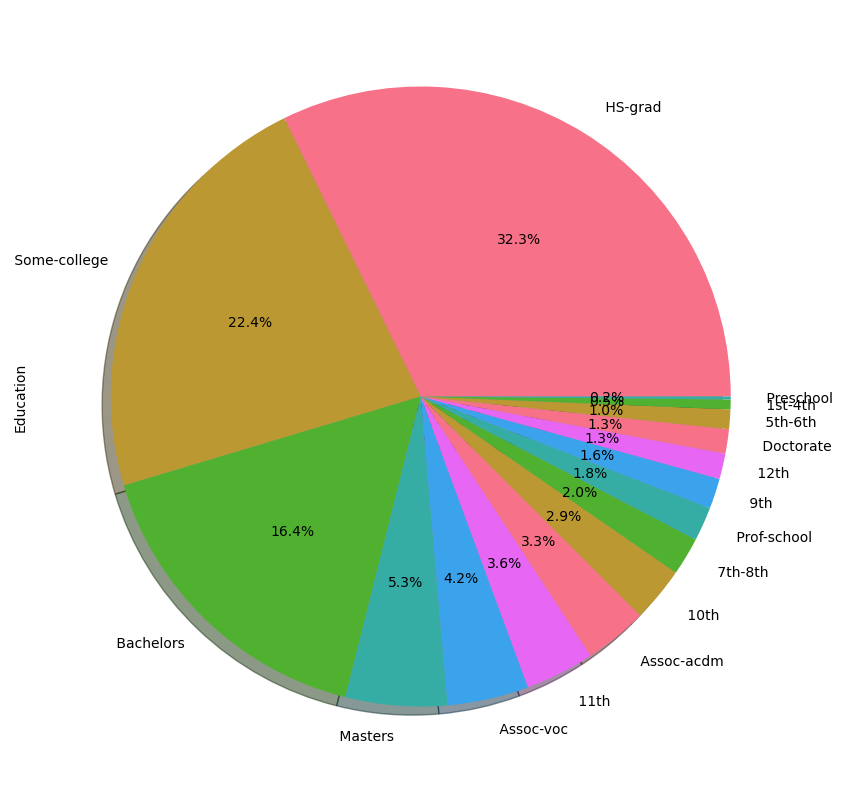

In [34]:
sns.set_palette('husl')
plt.figure(figsize=(10, 20))
ci['Education'].value_counts().plot.pie(autopct='%3.1f%%',
                                          textprops ={'fontsize':10},shadow=True)

<Axes: ylabel='Marital_status'>

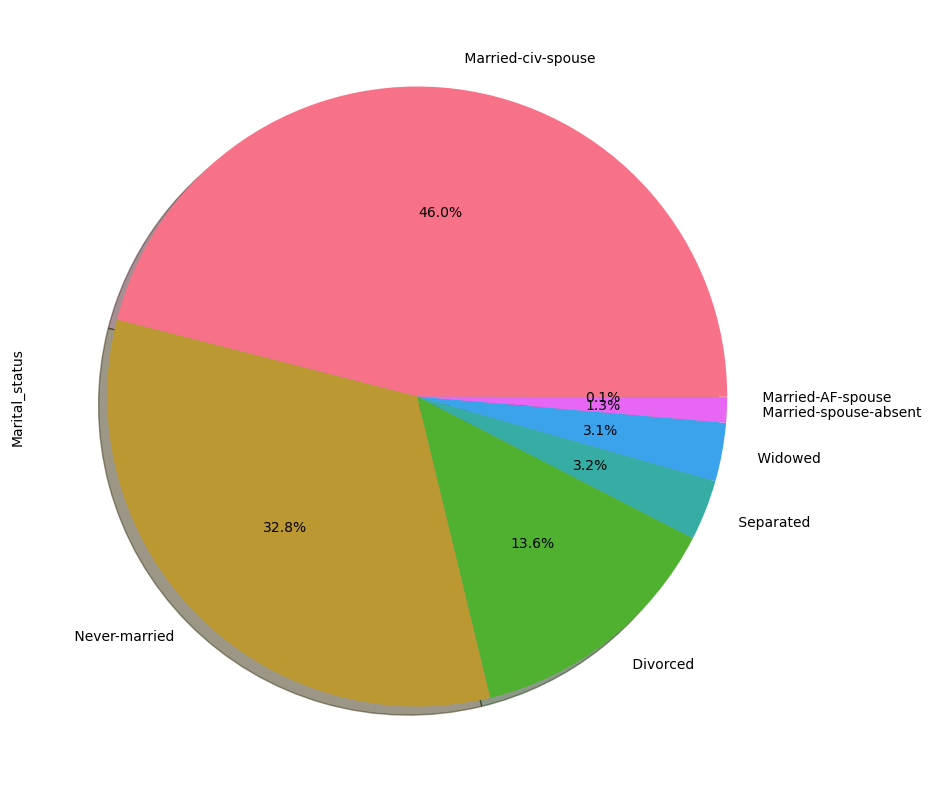

In [35]:
sns.set_palette('husl')
plt.figure(figsize=(10, 20))
ci['Marital_status'].value_counts().plot.pie(autopct='%3.1f%%',
                                          textprops ={'fontsize':10},shadow=True)

<Axes: ylabel='Race'>

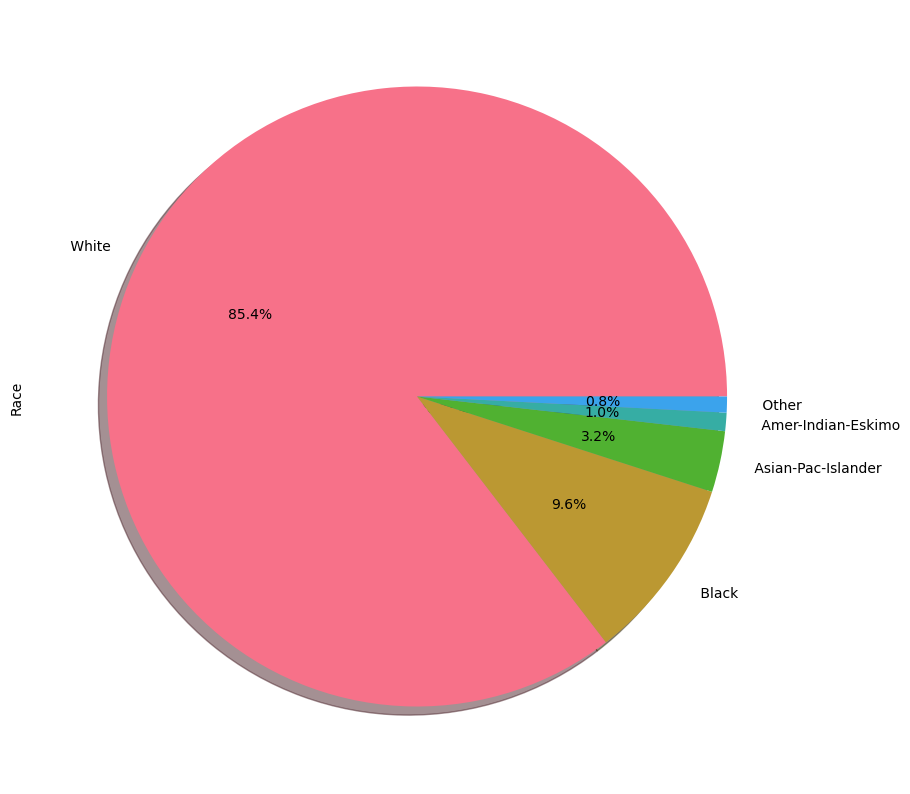

In [36]:
sns.set_palette('husl')
plt.figure(figsize=(10, 20))
ci['Race'].value_counts().plot.pie(autopct='%3.1f%%',
                                          textprops ={'fontsize':10},shadow=True)

<Axes: >

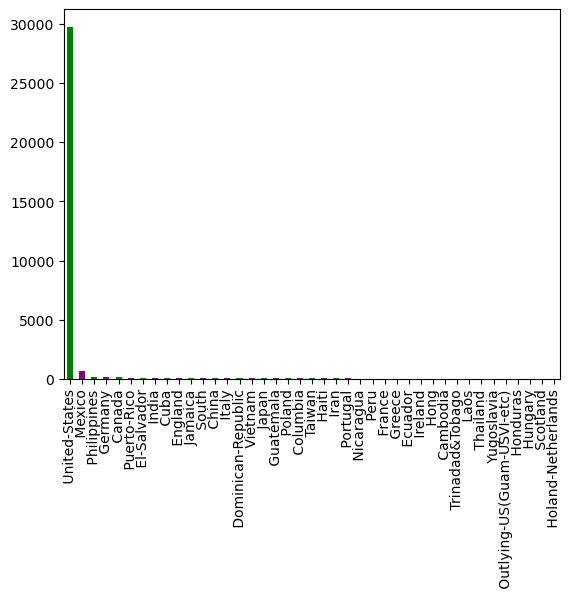

In [37]:
ci['Native_country'].value_counts().plot(kind='bar', color=['green', 'purple'])

# Encoding

In [38]:
ci.head(300)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,37,Self-emp-inc,57424,Bachelors,13,Divorced,Sales,Not-in-family,White,Female,0,0,60,United-States,<=50K
296,24,Private,278130,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
297,38,Private,169469,HS-grad,9,Divorced,Sales,Not-in-family,White,Male,0,0,80,United-States,<=50K
298,48,Private,146268,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,7688,0,40,United-States,>50K


In [39]:
ci.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [40]:
# Encoding

In [41]:
Numerical=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    ci[i] = le.fit_transform(ci[i])
ci.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [1]:
#Train And Test

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings ('ignore')

In [44]:
ci.Income.value_counts()

0    24696
1     7839
Name: Income, dtype: int64

In [45]:
X = ci.drop(['Income'], axis =1)
Y = ci['Income']

In [46]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [48]:
X.shape

(49392, 14)

In [49]:
Y.shape

(49392,)

In [50]:
Y.value_counts()

0    24696
1    24696
Name: Income, dtype: int64

In [51]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [52]:
Xtrain.shape

(39513, 14)

In [53]:
Xtest.shape

(9879, 14)

In [54]:
Ytrain.shape

(39513,)

In [55]:
Ytest.shape

(9879,)

In [56]:
lg=LogisticRegression()
lg.fit(Xtrain,Ytrain)

LogisticRegression()

In [57]:
pred=lg.predict(Xtest)
pred

array([1, 0, 1, ..., 1, 1, 1])

In [58]:
accuracy_score(pred,Ytest)

0.6917704221075007

In [59]:
dtc=DecisionTreeClassifier()
dtc.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [60]:
preddtc=dtc.predict(Xtest)
preddtc

array([1, 0, 1, ..., 1, 0, 1])

In [61]:
print(accuracy_score(Ytest,preddtc))

0.8585889260046563


In [64]:
dtr=DecisionTreeRegressor()
dtr.fit(Xtrain,Ytrain)

DecisionTreeRegressor()

In [65]:
preddtr=dtr.predict(Xtest)
preddtr

array([0., 0., 1., ..., 1., 0., 1.])

In [67]:
print(accuracy_score(Ytest,preddtr))

0.8584877011843304


In [68]:
knn=KNeighborsClassifier()
knn.fit(Xtrain,Ytrain)

KNeighborsClassifier()

In [69]:
predknn=knn.predict(Xtest)
pred

array([1, 0, 1, ..., 1, 1, 1])

In [70]:
print(accuracy_score(Ytest,predknn))

0.7240611397914769


In [72]:
predicted = list(dtc.predict(Xtest))
original = list(Ytest)

In [74]:
predicted_ci = pd.DataFrame({'predicted': predicted, 'original': original})
pd.DataFrame(predicted_ci)

,predicted,original
0,1,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
9874,0,0
9875,1,1
9876,1,0
9877,0,0


In [77]:
def censuspredict(p):
    p=p.values.reshape(1,-1)
    pred=dtc.predict(p)
    print("Predicted Value:",predicted)
    if pred==0:
        print("The person will not earn above $50K per year")
    else:
        print("The person will earn above $50K per year")   

In [78]:
p = pd.DataFrame({
    'Age': ['28'],
    'Workclass': ['3'], 
    'Fnlwgt': ['338409'], 
    'Education': ['9'], 
    'Education_num': ['13'],
    'Marital_status': ['2'],
    'Occupation': ['9'], 
    'Relationship': ['5'], 
    'Race': ['2'], 
    'Sex': ['0'],
    'Capital_gain': ['0'],
    'Capital_loss': ['0'], 
    'Hours_per_week': ['40'], 
    'Native_country': ['4'] 
    
})

censuspredict(p)

Predicted Value: [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1

# Hyperparameter Tuning

In [79]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [82]:
import numpy as np
alpha_min = 0.1
alpha_max = 1
num_values = 10
alphas = np.logspace(np.log10(alpha_min), np.log10(alpha_max), num=num_values)

print("Alpha values:", alphas)

Alpha values: [0.1        0.12915497 0.16681005 0.21544347 0.27825594 0.35938137
 0.46415888 0.59948425 0.77426368 1.        ]


In [83]:
alphavalue = {'alpha': [0.1, 0.12915497, 0.16681005, 0.21544347, 0.27825594, 0.35938137,
 0.46415888, 0.59948425, 0.77426368, 1.]}

model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=alphavalue, cv=5)
grid.fit(X, Y)

print("Best score:", grid.best_score_)
print("Best estimator alpha:", grid.best_estimator_.alpha)
print("Best params:", grid.best_params_)

Best score: -0.05679418909262761
Best estimator alpha: 1.0
Best params: {'alpha': 1.0}


In [84]:
import os

model_file = 'best_model.pkl'
if os.path.exists(model_file):
    print("Best model is saved as", model_file)
else:
    print("Failed to save the model.")

Best model is saved as best_model.pkl


# Overview
The aim of the project using the provided dataset extracted from the 1994 Census bureau database is to develop a predictive model to determine whether a person makes over $50K a year based on various socio-economic characteristics.


# Data Description

The dataset extracted from the 1994 Census bureau database comprises socio-economic information of individuals, aimed at predicting whether a person earns over $50K annually. 

One of the key features in the dataset is 'fnlwgt' (final weight), which represents weights assigned to individuals in the Current Population Survey (CPS) files. These weights are calibrated to independent estimates of the civilian non-institutional population of the US. They're derived from three sets of controls: single cell estimates of population by state, controls for Hispanic origin by age and sex, and controls by race, age, and sex. These weights play a crucial role in accurately representing the demographic characteristics of the population under study.

The dataset contains various other features such as age, education level, occupation, marital status, relationship, race, gender, capital gains, capital losses, and hours worked per week, among others. Each record in the dataset represents an individual, and the target variable 'Income' indicates whether the individual's income exceeds $50K per year.

# Model Selection and Training
A variety of machine learning models were explored, such as logistic regression, k-neighbors classifier, decision tree regressor and decsion tree classifier. These models were selected for their capacity to handle regression and classification tasks and their flexibility in capturing complex relationships within the data. Prior to training, the dataset was partitioned into training and testing subsets using the train_test_split function from the scikit-learn library, ensuring robust model evaluation and performance assessment.

# Hyperparameter Tuning
Hyperparameter tuning was performed for some models to optimize their performance. This process involved selecting the best values for the hyperparameters using techniques such as grid search or randomized search. Evaluation metrics were used to compare different models and select the best-performing one.

# Evaluation Metrics
The performance of the trained models was evaluated using appropriate evaluation metrics. These metrics provide insights into how well the models are able to predict the next day maximum and minimum temperature based on the given features.